In [1]:
import pandas as pd
restaurants = pd.read_csv("../data/yelp_dohmh_agg_data.csv", index_col=0)

In [9]:
pd.set_option("max_columns", None)
restaurants.head()

,DOHMH DBA,DOHMH BORO,DOHMH BUILDING,DOHMH STREET,DOHMH ZIPCODE,DOHMH PHONE,DOHMH CUISINE DESCRIPTION,DOHMH INITIAL INSPECTION DATE,DOHMH ACTION,DOHMH VIOLATION CODE,DOHMH VIOLATION DESCRIPTION,DOHMH CRITICAL FLAG,DOHMH SCORE,DOHMH GRADE,DOHMH GRADE DATE,DOHMH RECORD DATE,DOHMH INITIAL INSPECTION TYPE,DOHMH LATEST INSPECTION DATE,YELP IS CLOSED,YELP LATITUDE,YELP ADDRESS,YELP ID,YELP RATING,YELP REVIEW COUNT,YELP IS CLAIMED,YELP LONGITUDE,YELP NEIGHBORHOODS,YELP CATEGORIES,YELP NAME
CAMIS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30075445,MORRIS PARK BAKE SHOP,BRONX,1007.0,MORRIS PARK AVE,10462,7.188925e+09,Bakery,2013-06-01,Violations were cited in the following area(s).,16B,The original nutritional fact labels and/or in...,Not Critical,NaN,NaN,NaN,09/27/2016,Trans Fat / Compliance Inspection,2016-02-18,False,40.848446,1007 Morris Park Avenue,morris-pk-bake-shop-bronx,4.5,27.0,False,-73.856079,Morris Park,Bakeries|Desserts,Morris Pk Bake Shop
30112340,WENDY'S,BROOKLYN,469.0,FLATBUSH AVENUE,11225,7.182875e+09,Hamburgers,2014-06-05,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,NaN,NaN,09/27/2016,Cycle Inspection / Initial Inspection,2016-04-30,False,40.662952,469 Flatbush Ave,wendys-brooklyn-4,2.0,23.0,False,-73.961753,Prospect Heights|Prospect Lefferts Gardens,Fast Food|Burgers,Wendy's
30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351.0,WEST 57 STREET,10019,2.122453e+09,Irish,2013-07-22,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,11.0,A,07/22/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-31,False,40.767750,351 W 57th St,dj-reynolds-new-york-3,3.0,75.0,False,-73.984870,Midtown West|Hell's Kitchen,Irish|Pubs,DJ Reynolds
40356018,RIVIERA CATERER,BROOKLYN,2780.0,STILLWELL AVENUE,11224,7.183723e+09,American,2013-06-05,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,06/05/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-16,False,40.579521,2780 Stillwell Ave,riviera-caterers-brooklyn,4.0,23.0,True,-73.982430,Coney Island,Caterers,Riviera Caterers
40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825.0,ASTORIA BOULEVARD,11369,7.183351e+09,American,2014-04-11,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,50.0,NaN,NaN,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-14,False,40.764240,8825 Astoria Blvd,events-by-brunos-jackson-heights,4.0,15.0,True,-73.880410,East Elmhurst,Caterers|Venues & Event Spaces,Events By Bruno's


In [4]:
restaurants['YELP ID'].isnull().sum()

6231

In [8]:
restaurants_missing_from_yelp = restaurants[restaurants['YELP ID'].isnull()]

In [10]:
len(restaurants), len(restaurants_missing_from_yelp)

(26064, 6231)

In [19]:
missing_addresses = restaurants_missing_from_yelp.apply(lambda srs: " ".join(
        [str(srs['DOHMH BUILDING']).replace(".0", "").replace("NaN", ""), srs['DOHMH STREET'] + ",", srs['DOHMH BORO']]
    ), axis='columns')

In [22]:
import geocoder
from tqdm import tqdm
latlngs = []
for address in tqdm(missing_addresses[:2500]):
    try:
        latlngs.append(geocoder.google(address))
    except:
        print(str(address) + " failed!")
        latlngs.append(None)
        continue

 31%|████████████                           | 773/2500 [06:02<08:27,  3.40it/s]

11 WEST    8 STREET, MANHATTAN failed!


 31%|████████████                           | 774/2500 [06:07<49:34,  1.72s/it]

1455 EAST  222 STREET, BRONX failed!


100%|██████████████████████████████████████| 2500/2500 [14:52<00:00,  3.84it/s]


In [24]:
latlngs2 = []
for address in tqdm(missing_addresses[2500:5000]):
    try:
        latlngs2.append(geocoder.google(address))
    except:
        print(str(address) + " failed!")
        latlngs2.append(None)
        continue

100%|██████████████████████████████████████| 2500/2500 [09:20<00:00,  5.96it/s]


In [25]:
latlngs3 = []
for address in tqdm(missing_addresses[5000:]):
    try:
        latlngs3.append(geocoder.google(address))
    except:
        print(str(address) + " failed!")
        latlngs3.append(None)
        continue

100%|██████████████████████████████████████| 1231/1231 [03:44<00:00,  5.46it/s]


In [69]:
xy = [g.latlng if pd.notnull(g) else [0, 0] for g in latlngs + latlngs2 + latlngs3]

In [70]:
xy

[[40.8502883, -73.8786113],
 [40.57529450000001, -73.98147469999999],
 [40.6522396, -73.9245995],
 [40.7573566, -73.9753735],
 [40.7282239, -73.7948516],
 [40.76283129999999, -73.9660305],
 [40.7224876, -73.94839189999999],
 [40.728815, -73.98966349999999],
 [40.7547198, -73.9812628],
 [40.8033908, -73.96392089999999],
 [40.7569379, -73.91427200000001],
 [40.715051, -73.9983],
 [40.702028, -73.808593],
 [40.5609155, -73.9170224],
 [40.7054175, -73.80919],
 [40.7663783, -73.9789998],
 [40.7288932, -73.98895759999999],
 [40.703885, -73.876876],
 [40.6487475, -73.95802549999999],
 [40.8979693, -73.8670028],
 [40.8502883, -73.8786113],
 [40.8502883, -73.8786113],
 [40.8502883, -73.8786113],
 [40.8502883, -73.8786113],
 [40.8502883, -73.8786113],
 [40.7498519, -73.97117790000001],
 [40.7298006, -73.7796156],
 [40.7760336, -73.9818416],
 [40.7151562, -74.0089297],
 [40.715159, -73.807954],
 [40.8977733, -73.8672088],
 [40.5595488, -74.1681442],
 [40.76306150000001, -73.9813814],
 [40.8063634

In [71]:
len(xy)

6231

In [72]:
len(restaurants_missing_from_yelp)

6231

In [73]:
import numpy as np
np.asarray(xy)

array([[40.8502883, -73.8786113], [40.57529450000001, -73.98147469999999],
       [40.6522396, -73.9245995], ..., [], [], []], dtype=object)

In [74]:
xy[2500:]

[[40.7152328, -73.99898999999999],
 [40.8466379, -73.83225820000001],
 [40.6016001, -74.0022237],
 [40.7522071, -73.9853713],
 [40.7340293, -73.87298849999999],
 [40.7553835, -73.9744396],
 [40.7923787, -73.9730395],
 [40.5889257, -73.8164927],
 [40.6781784, -73.9441579],
 [40.8705556, -73.84675899999999],
 [40.8891306, -73.84249539999999],
 [40.7285977, -73.9876718],
 [40.7340293, -73.87298849999999],
 [40.7154746, -73.99001679999999],
 [40.7282239, -73.7948516],
 [40.83159870000001, -73.86654539999999],
 [40.68925600000001, -73.96923819999999],
 [40.5888798, -73.8120725],
 [40.8535879, -73.93091989999999],
 [40.8162186, -73.9026777],
 [40.711799, -73.957161],
 [40.743399, -73.9241866],
 [40.7220988, -73.9586837],
 [40.71686589999999, -73.9108163],
 [40.85473450000001, -73.8855099],
 [40.86792, -73.834304],
 [40.8612275, -73.88923539999999],
 [40.8612275, -73.88923539999999],
 [40.7507917, -73.98952609999999],
 [40.6562318, -74.0079713],
 [40.73988689999999, -73.98494],
 [40.7351561, 

TIL: `geocoder` doesn't account for when a geocoder is rate-limited. And here I thought...never mind.

In [75]:
xy_full = xy[:2547]

In [77]:
for t in xy_full:
    try:
        x, y = t
    except:
        print(t)

[]
[]
[]
[]
[]
[]
[]
[]


In [78]:
lats = [t[0] if len(t) > 0 else None for t in xy_full]

In [79]:
longs = [t[1] if len(t) > 0 else None for t in xy_full]

In [83]:
sample = restaurants_missing_from_yelp.head(2547)
sample['YELP LATITUDE'] = lats
sample['YELP LONGITUDE'] = longs

C:\Users\Alex\Anaconda3\envs\nyc-restaurant-trends\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Alex\Anaconda3\envs\nyc-restaurant-trends\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [84]:
sample.head()

,DOHMH DBA,DOHMH BORO,DOHMH BUILDING,DOHMH STREET,DOHMH ZIPCODE,DOHMH PHONE,DOHMH CUISINE DESCRIPTION,DOHMH INITIAL INSPECTION DATE,DOHMH ACTION,DOHMH VIOLATION CODE,DOHMH VIOLATION DESCRIPTION,DOHMH CRITICAL FLAG,DOHMH SCORE,DOHMH GRADE,DOHMH GRADE DATE,DOHMH RECORD DATE,DOHMH INITIAL INSPECTION TYPE,DOHMH LATEST INSPECTION DATE,YELP IS CLOSED,YELP LATITUDE,YELP ADDRESS,YELP ID,YELP RATING,YELP REVIEW COUNT,YELP IS CLAIMED,YELP LONGITUDE,YELP NEIGHBORHOODS,YELP CATEGORIES,YELP NAME
CAMIS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40357217,WILD ASIA,BRONX,2300.0,SOUTHERN BOULEVARD,10460,7.182208e+09,American,2013-06-19,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,4.0,A,06/19/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-04-19,NaN,40.850288,NaN,NaN,NaN,NaN,NaN,-73.878611,NaN,NaN,NaN
40359705,NATHAN'S FAMOUS,BROOKLYN,1310.0,SURF AVENUE,11224,7.183332e+09,Hotdogs,2013-12-03,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,12/03/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-07-08,NaN,40.575295,NaN,NaN,NaN,NaN,NaN,-73.981475,NaN,NaN,NaN
40362869,SHASHEMENE INT'L RESTAURA,BROOKLYN,195.0,EAST 56 STREET,11203,3.474301e+09,Caribbean,2013-05-08,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7.0,A,05/08/2013,09/27/2016,Cycle Inspection / Initial Inspection,2015-12-10,NaN,40.652240,NaN,NaN,NaN,NaN,NaN,-73.924599,NaN,NaN,NaN
40363685,BERKELEY,MANHATTAN,437.0,MADISON AVENUE,10022,2.128328e+09,American,2013-06-07,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,06/07/2013,09/27/2016,Cycle Inspection / Initial Inspection,2016-05-02,NaN,40.757357,NaN,NaN,NaN,NaN,NaN,-73.975374,NaN,NaN,NaN
40364262,TERMINAL CAFE/YANKEE CLIPPER,QUEENS,0.0,GUARDIA AIRPORT PARKING,11371,9.172998e+09,American,2013-05-10,Violations were cited in the following area(s).,08B,Covered garbage receptacle not provided or ina...,Not Critical,10.0,A,05/10/2013,09/27/2016,Cycle Inspection / Initial Inspection,2015-10-22,NaN,40.728224,NaN,NaN,NaN,NaN,NaN,-73.794852,NaN,NaN,NaN


In [90]:
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline
plt.scatter(sample['YELP LONGITUDE'], sample['YELP LATITUDE'])
mplleaflet.show()
# sample[['YELP LATITUDE', 'YELP LONGITUDE']].values

The plot above shows that some of these are in random places because Google couldn't figure it out, so we need to bound them to NYC.

In [92]:
plt.scatter([-74.2589,-73.7004], [40.4774,40.9176])
mplleaflet.show()

Taken from Flickr. That works.

In [96]:
sample_fixed = sample[(sample['YELP LONGITUDE'] < -73.7004) &
                      (sample['YELP LONGITUDE'] > -74.2589) &
                      (sample['YELP LATITUDE'] > 40.4774) &
                      (sample['YELP LATITUDE'] < 40.9176)]

In [97]:
len(sample_fixed)

2508

In [113]:
testcase = pd.concat([restaurants[pd.notnull(restaurants['YELP LONGITUDE'])], sample_fixed])

This is applied incorrectly.

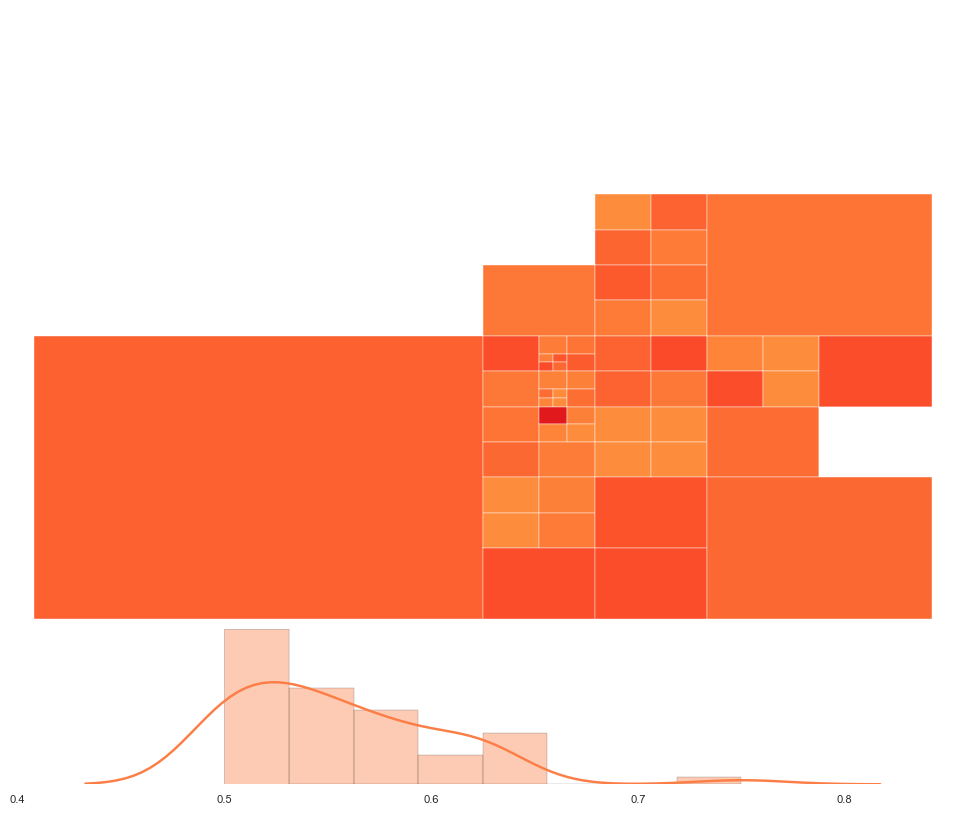

In [127]:
msno.geoplot(testcase[['YELP LATITUDE', 'YELP LONGITUDE', 'YELP CATEGORIES', 'YELP NAME']].sample(1000), 
             x='YELP LONGITUDE', y='YELP LATITUDE', histogram=True)

In [98]:
plt.scatter(sample_fixed['YELP LONGITUDE'], sample_fixed['YELP LATITUDE'])
mplleaflet.show()

In [104]:
import missingno as msno

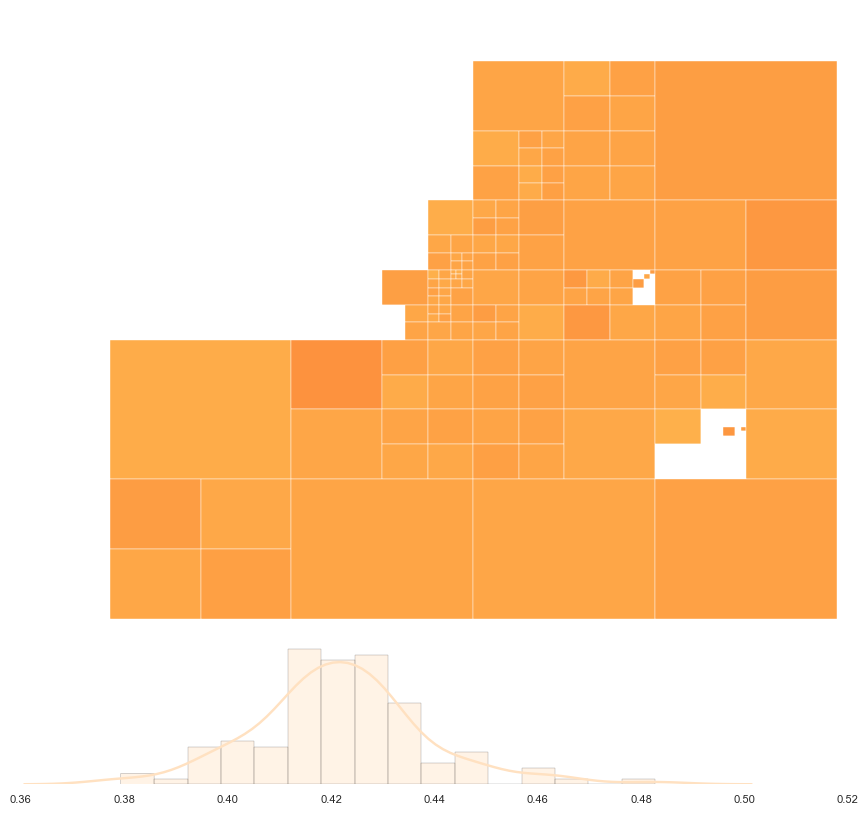

In [106]:
msno.geoplot(sample_fixed, x='YELP LONGITUDE', y='YELP LATITUDE', histogram=True)

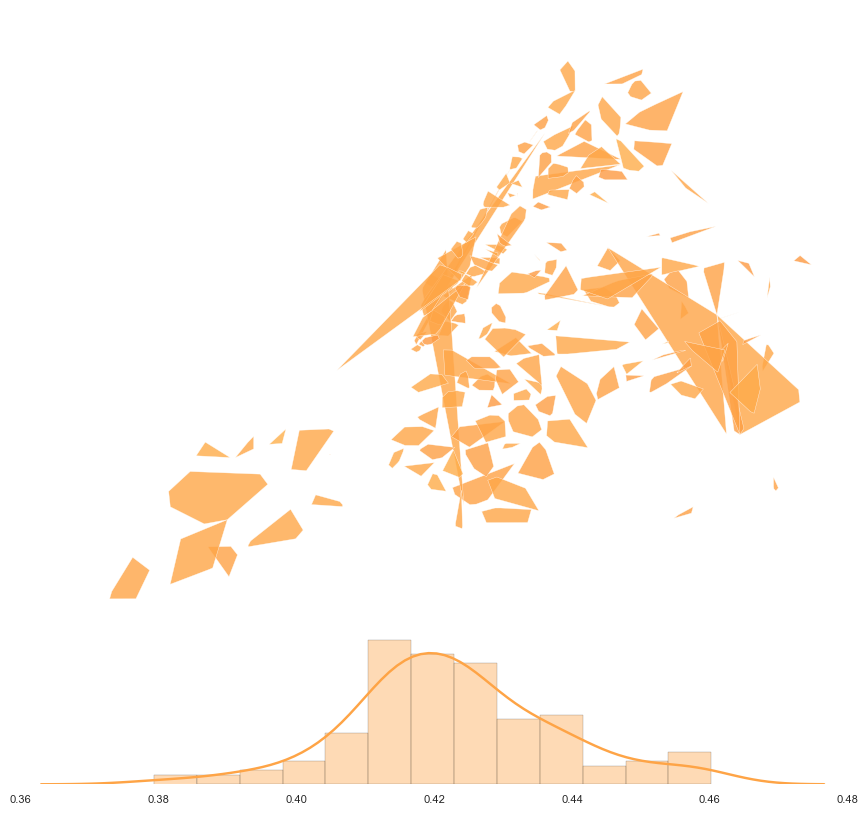

In [110]:
msno.geoplot(sample_fixed, x='YELP LONGITUDE', y='YELP LATITUDE', by='DOHMH ZIPCODE', histogram=True)